In [1]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
from ibllib.atlas import AllenAtlas

one = ONE()
ba = AllenAtlas()
pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'

sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()
clusters = sl.merge_clusters(spikes, clusters, channels)

Enter Alyx password for "intbrainlab":········


HTTPError: Failed to load the remote cache file


Enter Alyx password for "intbrainlab":········
Connected to https://openalyx.internationalbrainlab.org as intbrainlab


No default revision for dataset alf/probe00/clusters.amps.npy; using most recent
No default revision for dataset alf/probe00/clusters.amps.npy; using most recent
No default revision for dataset alf/probe00/clusters.amps.npy; using most recent
No default revision for dataset alf/probe00/clusters.amps.npy; using most recent


In [2]:
import numpy as np

In [3]:
spikes

{'amps': array([1.12502950e-04, 1.69044700e-04, 7.31735374e-05, ...,
        6.32226820e-05, 8.56651966e-05, 1.58687280e-04]),
 'clusters': array([639, 518, 208, ...,  36, 258,  99], dtype=uint32),
 'depths': array([3540.57568359, 3132.62036133, 1634.10498047, ...,  293.59072876,
        2001.93505859,  865.07281494]),
 'times': array([5.48913109e-03, 8.12244216e-03, 1.18557439e-02, ...,
        4.29594537e+03, 4.29594561e+03, 4.29594777e+03])}

In [4]:
from neo.core import AnalogSignal
import quantities as pq

In [5]:
from neo.core import SpikeTrain

In [6]:
from elephant.spike_train_generation import spike_extraction

In [7]:
def transform_data(t, c, com):
    pts = len(t)
    
    l = []
    for i in c:
        if i not in l:
            l.append(i)
    indDict = {}
    for i in l:
        indDict[i] = []
        
    for i in range(pts):
        indDict[c[i]].append(t[i])
        
    myKeys = list(indDict.keys())
    myKeys.sort()
    sorted_dict = {i: indDict[i] for i in myKeys}
        
    ST_oscillator = []
    for i in sorted_dict:
        if i in com:
            ST_oscillator.append(SpikeTrain(indDict[i] * pq.s, t_start = min(t), t_stop = max(t)))
        
    return ST_oscillator

In [8]:
clust_l = []
for i in range(0, 100000, 10000):
    clust_l.append(list(spikes['clusters'][i:i+10000]))
    
clust_l

common_clusts = list(set(clust_l[0]).intersection(*clust_l))

In [9]:
l_STs = []
for i in range(0, 100000, 10000):
    l_STs.append(transform_data(spikes['times'][i:i + 10000], spikes['clusters'][i:i+10000], common_clusts))
    print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [10]:
spiketrains_oscillator = l_STs.copy()

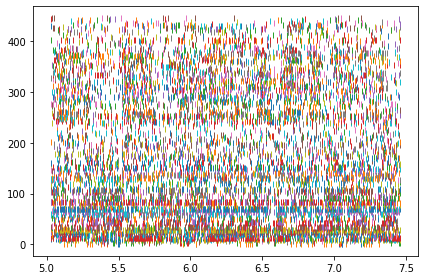

In [11]:
import matplotlib.pyplot as plt

trial_to_plot = 2
for i, spiketrain in enumerate(spiketrains_oscillator[trial_to_plot]):
    plt.plot(spiketrain, np.ones_like(spiketrain) * i, ls='', marker='|')

plt.tight_layout()
plt.show()

In [12]:
from elephant.gpfa import GPFA


# specify fitting parameters
bin_size = 20 * pq.ms
latent_dimensionality = 2

gpfa_2dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)

In [13]:
gpfa_2dim.fit(l_STs[:5])

C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 80 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 8 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 39 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 77 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 28 last s

Initializing parameters using factor analysis...

Fitting GPFA model...


GPFA(x_dim=2)

In [14]:
print(gpfa_2dim.params_estimated.keys())

dict_keys(['covType', 'gamma', 'eps', 'd', 'C', 'R', 'notes'])


In [15]:
gpfa_2dim.params_estimated['C']

array([[-3.59569388e-02, -7.53606710e-02],
       [-3.89365687e-02, -9.73376224e-04],
       [-5.41128798e-02,  5.73122270e-02],
       [ 6.55661598e-03, -1.23865513e-02],
       [-4.36395439e-02,  5.83040683e-03],
       [-1.62343058e-02,  7.84524757e-03],
       [-1.90964981e-02, -1.05506106e-02],
       [ 8.15315896e-03, -3.49092226e-02],
       [-8.81401158e-02,  2.06533337e-02],
       [ 1.91847723e-02, -3.08293819e-02],
       [-1.97175720e-01, -5.59056451e-02],
       [-8.93920663e-03,  7.20048033e-03],
       [ 3.37479713e-02, -2.27783953e-02],
       [ 8.77978752e-03,  2.60138098e-01],
       [ 1.66509021e-02, -2.68826654e-03],
       [-1.79593704e-02,  1.14836024e-02],
       [-1.18840436e-01,  2.51139125e-02],
       [-8.81436439e-03,  3.04842704e-03],
       [ 1.21577516e-02,  3.24676564e-02],
       [ 4.36180637e-03,  5.63544590e-02],
       [ 2.07500894e-01,  1.39142468e-02],
       [-4.55506298e-02,  2.47221610e-02],
       [-1.06854987e-01,  7.97335233e-03],
       [ 8.

In [16]:
trajectories = gpfa_2dim.transform(l_STs[5:])

C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 58 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 49 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 38 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 32 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 23 last 

In [17]:
# here we just reuse the existing instance of the GPFA() class as we use the same fitting parameters as before
trajectories2 = gpfa_2dim.fit_transform(l_STs)
trajectories_all = []
for j in range(len(trajectories2)):
    trajectories_all.append([i[:116] for i in trajectories2[j]])

C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 80 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 8 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 39 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 77 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 28 last s

Initializing parameters using factor analysis...

Fitting GPFA model...


C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 80 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 8 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 39 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 77 last spike(s) of the input spiketrain
  "input spiketrain".format(n_discarded))
C:\Users\risha\AppData\Local\Programs\Python\Python37\lib\site-packages\elephant\conversion.py:1171: UserWarning: Binning discarded 28 last s

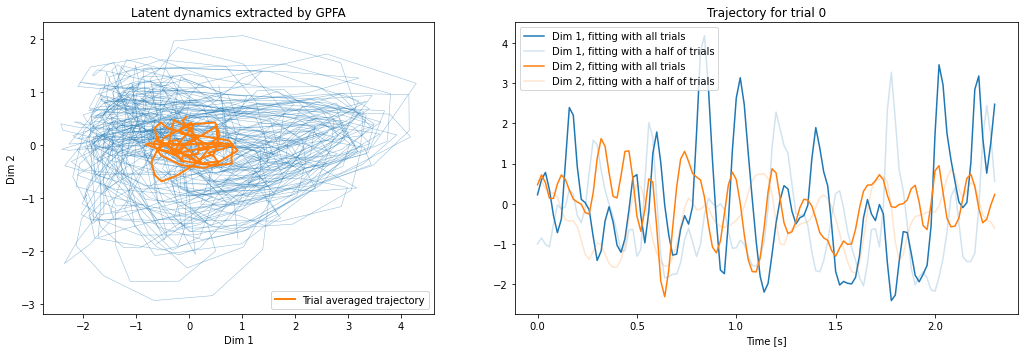

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

linewidth_single_trial = 0.5
color_single_trial = 'C0'
alpha_single_trial = 0.5

linewidth_trial_average = 2
color_trial_average = 'C1'

ax1.set_title('Latent dynamics extracted by GPFA')
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')
ax1.set_aspect(1)
for single_trial_trajectory in trajectories_all:
    ax1.plot(single_trial_trajectory[0], single_trial_trajectory[1], '-', lw=linewidth_single_trial, c=color_single_trial, alpha=alpha_single_trial)
average_trajectory = np.mean(trajectories_all, axis=0)
ax1.plot(average_trajectory[0], average_trajectory[1], '-', lw=linewidth_trial_average, c=color_trial_average, label='Trial averaged trajectory')
ax1.legend()

trial_to_plot = 0
ax2.set_title(f'Trajectory for trial {trial_to_plot}')
ax2.set_xlabel('Time [s]')
times_trajectory = np.arange(len(trajectories_all[trial_to_plot][0])) * bin_size.rescale('s')
ax2.plot(times_trajectory, trajectories_all[0][0], c='C0', label="Dim 1, fitting with all trials")
ax2.plot(times_trajectory, trajectories[0][0][:116], c='C0', alpha=0.2, label="Dim 1, fitting with a half of trials")
ax2.plot(times_trajectory, trajectories_all[0][1], c='C1', label="Dim 2, fitting with all trials")
ax2.plot(times_trajectory, trajectories[0][1][:116], c='C1', alpha=0.2, label="Dim 2, fitting with a half of trials")
ax2.legend()

plt.tight_layout()
plt.show()